#Metodo de la silueta (silhouette).
Queremos saber el numero optimo de "clusters" (grupos).
Este metodo es mas cuantitativo y preciso que el del "elbow". $

Vamos a definir dos conceptos nuevos
Notacion:


$$C_I = \{ x_{I1}, x_{I2}, \cdots , x_{I k_I}  \} .$$
donde:
$k_I =  C_I$ el numero de puntos en el conjunto $I$. Los  conjuntos (clusters) los notamos con letra mayuscula $I, J$, los elementos $x_{iI}$ con letra
minuscula. $x_{jI}$ es el elemento $i$ del grupo $I$.


Asumimos que el numero de clusters es $n$
* **Cohesion**:
Del elemento $x_{Ii}$ con respecto a los vecinos. Es el promedio de las distancias del punto $x_{Ii}$ a todos sus vecinos.
La distancia $d$ se puede medir con la metrica Euclidiana, o otra.

$$a_{iI} = \frac{1}{ |C_I| -1} \sum_{j=1}^{k_I} d(x_{Ij}, x_{Ii}) .$$
Queremos que la cohesion sea pequenha.

* **Separation**:
El minimo de los promedios de un punto $x_{Ii}$ a todos los **no vecinos**, elementos de otro "cluster".

$$b_{Ii} = \min_{J \ne I} \frac{1}{k_J} \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj})
\quad , \quad J=1,2, \cdots, I - 1, I+1, \cdots , n .$$

La figura es tomada de
[articulo en el metodo de la silueta](https://www.mdpi.com/1099-4300/23/6/759).

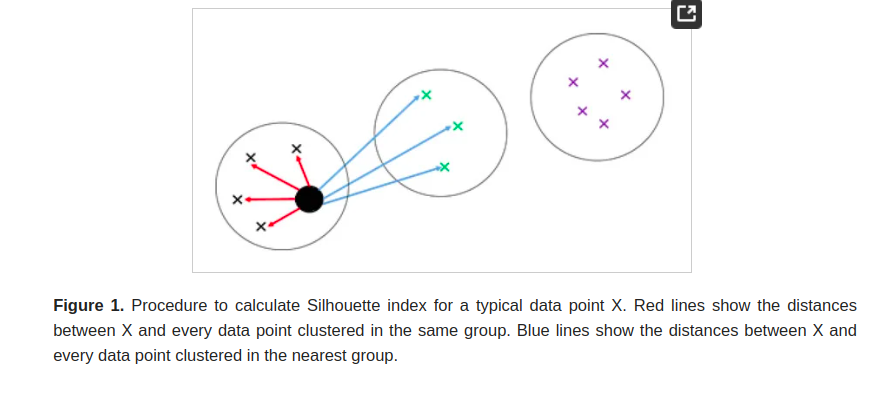

### Definicion de la silueta

\begin{eqnarray}
S_{Ii} = \left \{
    \begin{array}{cc}
     \frac{b_{Ii} - a_{Ii}}{ \max \{  a_{Ii}, b_{Ii} \} } & \text{si  } |C_I| > 1 \\
     0  & \text{si  } | C_I | = 1
    \end{array}
    \right .
\end{eqnarray}
La expresion $S_{Ii}$ indica la silueta para el punto $x_{Ii}$, con $i=1,2, , \cdots k_I$, y $I=1,2, \cdots, n$. Esta se puede ver como una function


\begin{eqnarray}
S : A & \to & (-1,1) \\
    x_{iI} &\to& S_{iI}
\end{eqnarray}

Comentarios sobre la silueta en un punto.

* Esta entre -1 y 1. Lo ideal  es 1. En este caso hay un distanciamiento grande y cohesion total. $a_{Ii}=0$ (esto si fuera un punto el claster)

* Silueta negativa quiere decir que el punto esta en el lugar (cluster) equivocado.

* La silueta 0 indica que un punto esta en la mitad de dos clusters.

$A = U_{i=1}^n C_I = X $

Se pueden usar ambos, la silueta y el codo. Son exclusivos.

De la pagina
[Python silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


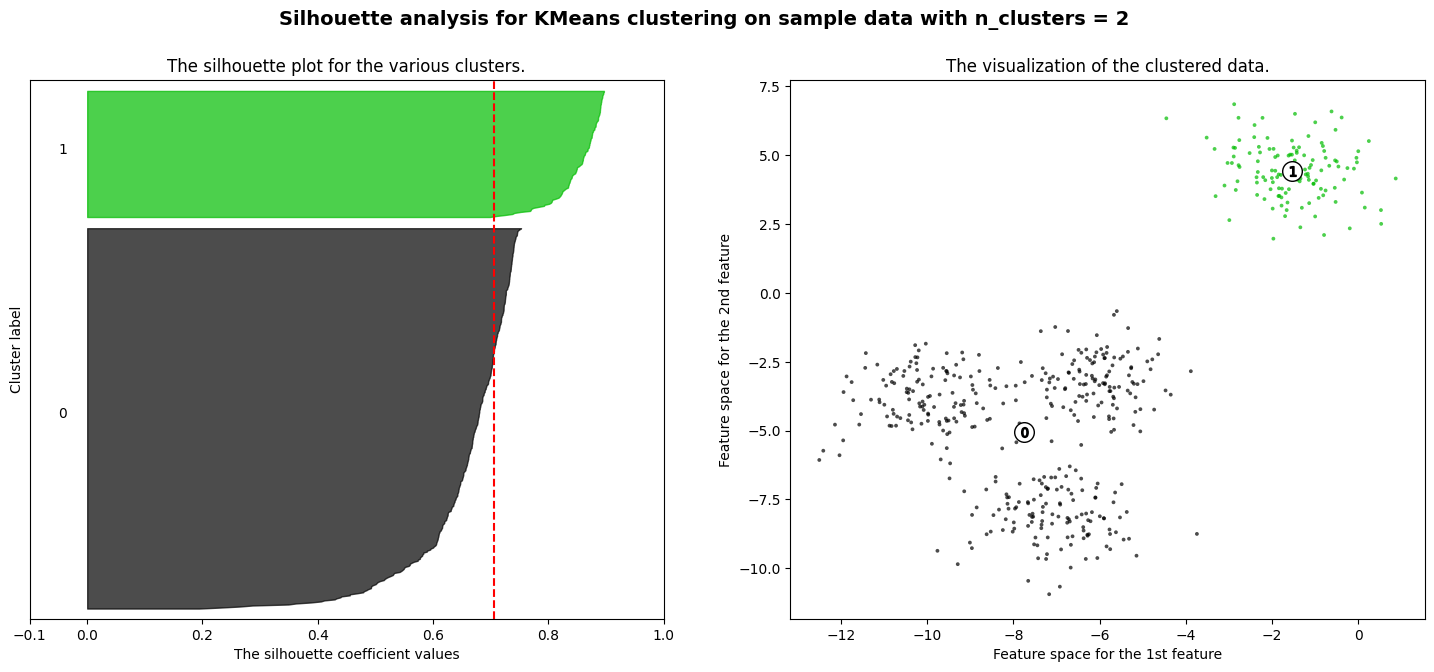

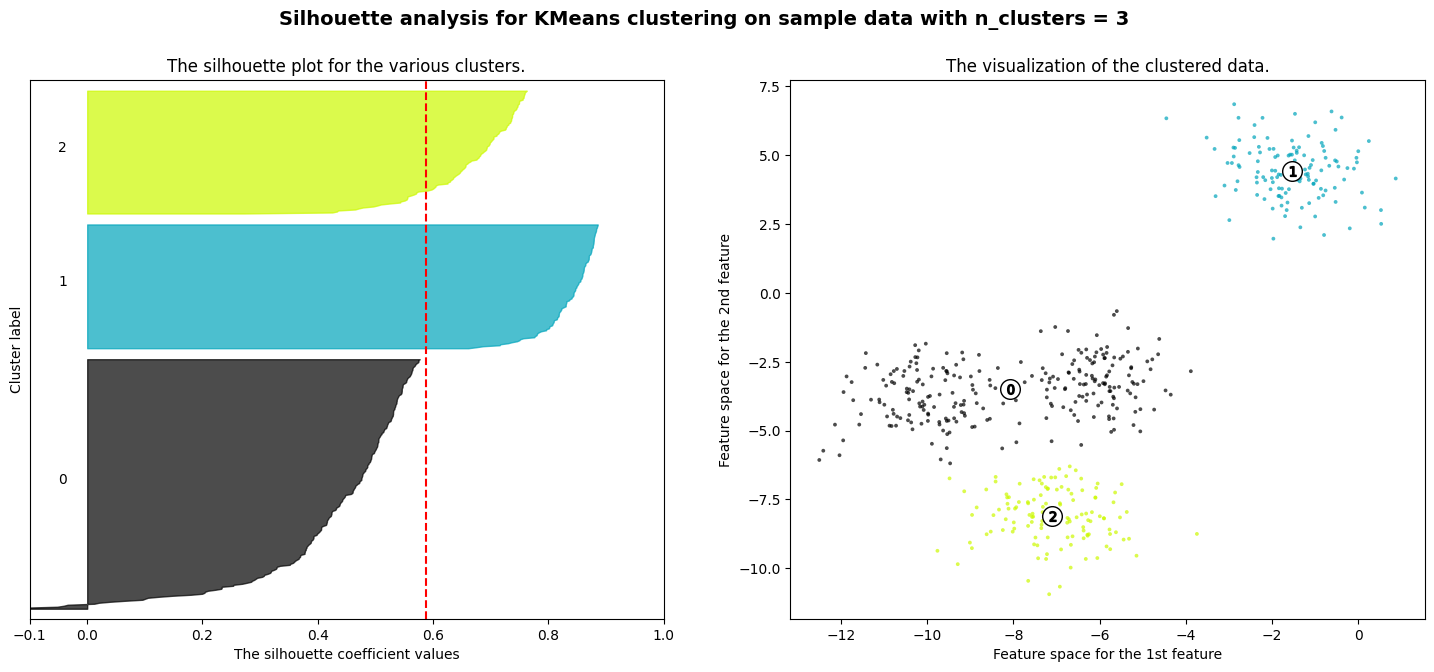

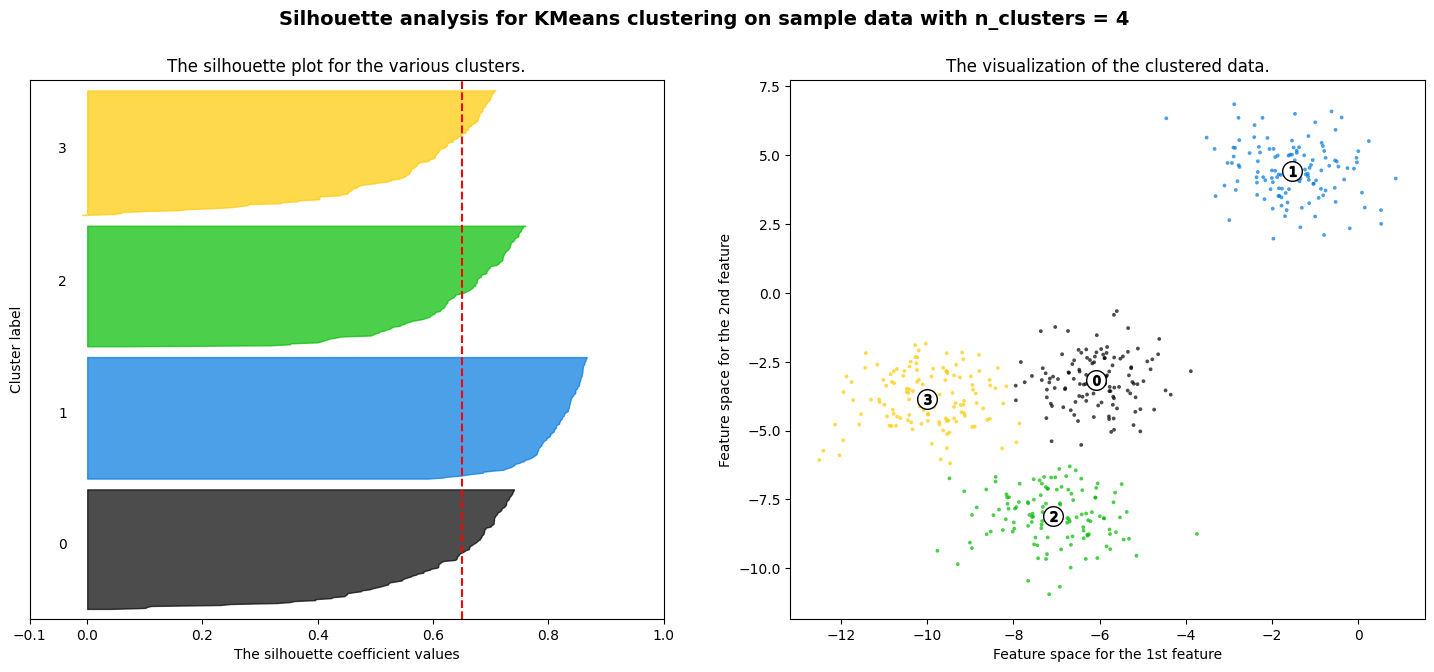

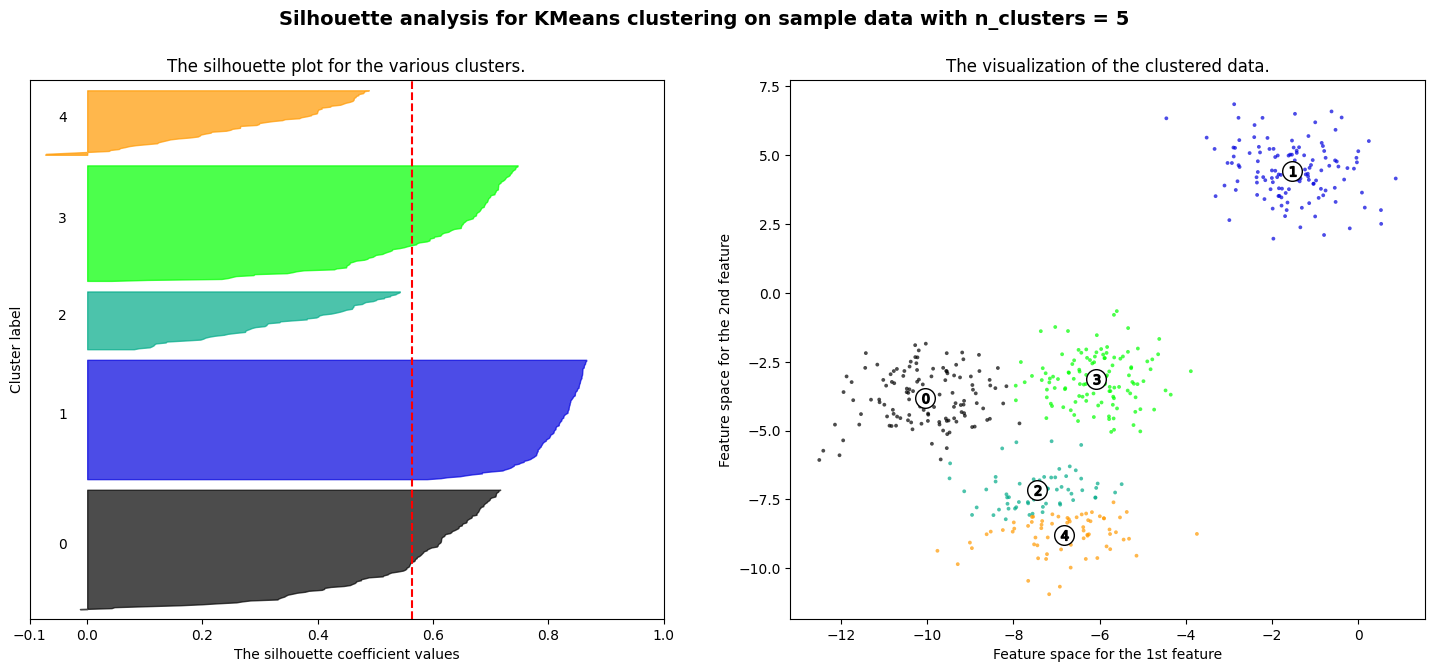

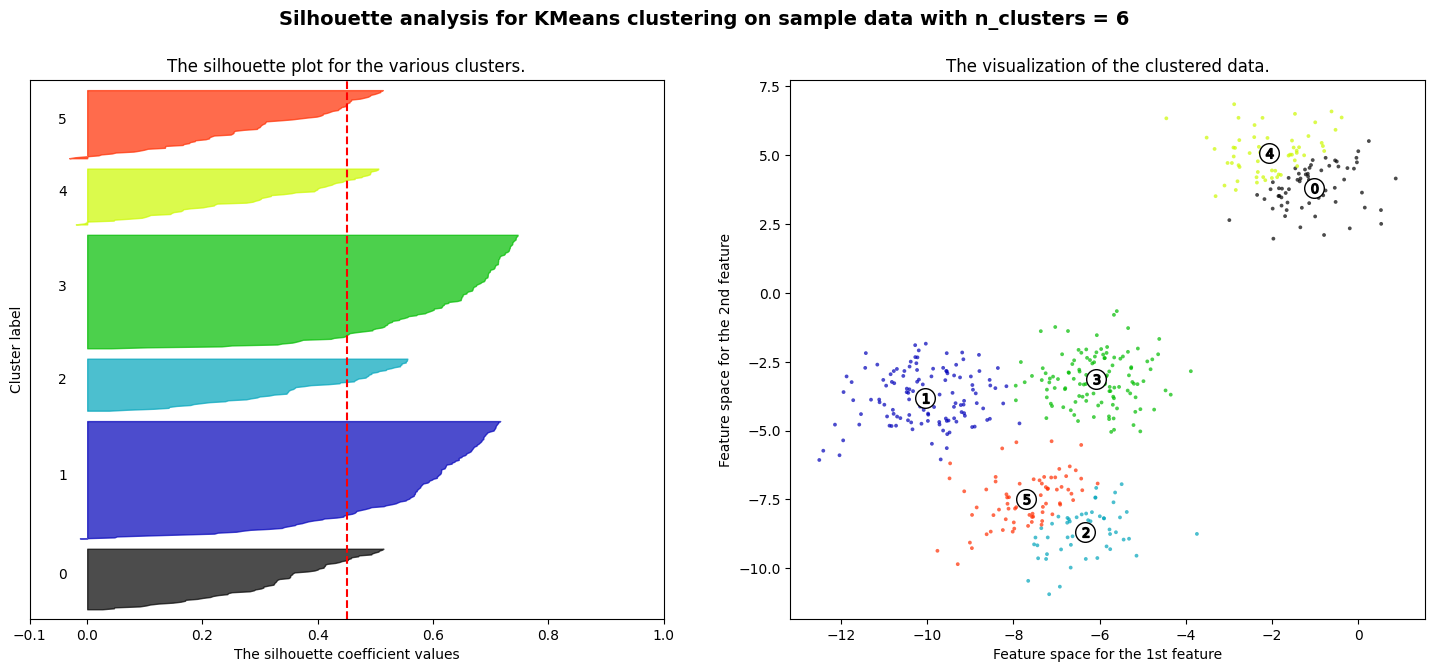

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# El GAP statistic method.
Este metodo usa estadistica y esta por fuera de nuestro alcance en este curso.


## Discusion sobre el k-means

* Asume que los clusters tiene cierta simetria esferica.  
* Es rapido y facil de entender.
* Asume que las fronteras son planas, aunque esto se puede arreglar con el "kernel trick" (usado en SVM).

Existen otros metodos:



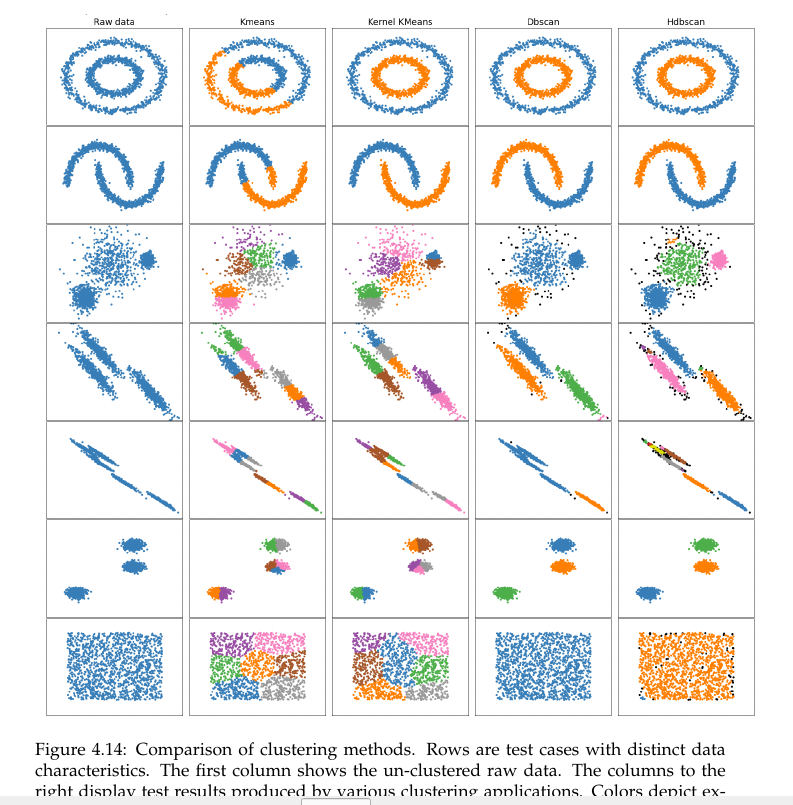

### Otros metodos

* DBSCAN (Density based)
* HDBSCAN (Hierarchical Density Based)

No los estudiamos en clase.

# Reduccion de dimensionalidad
Hay varias razones por las cuales quisieramos reducir el tamano (dimension) de los datos (numero de "features")

* Para una mejor visualizacion. Nosotros en papel y en la pantalla vemos muy bien en 2D.

* Reducir el almacenamiento y acelerar el procesamiento.


* El [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

El problema con las altas dimensiones es que entre mas aumenten las dimensiones mas esparsidos (sparsed) son los datos, de forma exponencial. Esto hace que se pierda precision estadistica y muchos metodos pueden tener un mayor error.

* Existen situaciones donde hay dimensiones superfluas. No contribuyen a nada. Y como decimos en Antioquia "lo que no sirve que no estorbe"






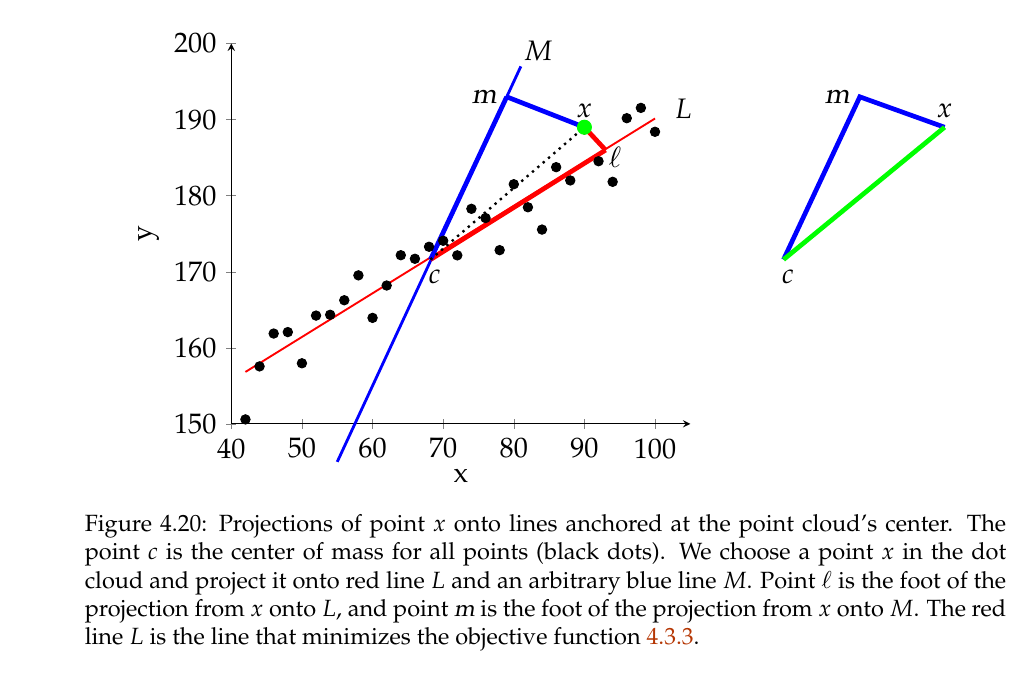

* Se tiene una nube de puntos negros (los datos $X$). Tomamos un punto arbitrario $x$ (en la Figura 4.20, color verde).

* Calculamos el centro geometrico de los puntos $c$.

* Tomemos una linea arbitraria (azul) que pasa por el centro $c$.

* Hacemos la proyeccion del punto $x$ a la linea. La base de la proyeccion la llamamos $m$.

* Tenemos un triangulo Pitagorico $xmc$.

* tenemos tres distancias $d(x,c)$, $d(x,m)$ , $d(m,c)$ que cumplen el teorema de Pitagoras.
Usamos la distancia Euclidiana (norma 2).

$$d(x,c)^2 = d(x,m)^2 + d(m,c)^2  \tag{1}.$$

* Podemos centrar el problema en 0, restando la media $c$. Entonces la Ecuacion (1) se reduce a:

$$ \| x \|^2 = \| x - m \|^2 + \| m \|^2  \tag{2} .$$

* Queremos minimizar las distancias a la recta **ideal** con un angulo $\theta$. Todas las posibles rectas que tengan angulos $\theta \in[0, 2 \pi]$

* Esto sugiere la siguiente funcion objetivo (costo).

$$ J_0(\theta) = \sum_{i=1}^m \| x_i - m_i \|^2 .$$

* Disucion con otros metodos:
    * En regresion lineal, toca calcular $\theta, b$. Aca no hay intersepto por que $c=0$. La recta pasa por el origen.
    En regresion lineal, las distancias son verticales $(y_i - (k x_i + b))^2$.
    * Las distancias del punto a la recta con perpendiculares (como SVM). Pero a diferencia de SVM aca minimizamos y no exigimos que unos puntos esten de un lado y otros de otra.

* Observacion: $x$ no depende de $\theta$.
Entonces en la Ecuacion (2), el termino de la izquierda es constante (con respecto a $\theta$). Entonces los dos terminos que suma hacen un "trade off". Si el uno crece, el otro decrece.

* La maximizacion de $\| m\|$ es igual a la minimizacion  de $\| x - m \|^2$.

* Esto nos produce una nueva funcion objetivo

$$J(\theta) = \sum_{i=1}^m \| m_i \|^2 .$$

Vamos a ver una ilustracion de esta situacion.

La siguiente figura se hizo con Matlab (copiado de algun sitio de internet).

[Anomacion para entender las funciones de costo definidas](https://drive.google.com/open?id=1Uv5_PXDJ-KRV7qZMqZzdOs1jzblcTipq).

Los valores de $m_i$ distancias son proyecciones, si $u$ es un vector unitario a lo largo de la recta $(\cos \theta, \sin \theta)$, entonces el vector proyeccion de
$m_i$ es $m_i = (x_i \cdot u) u$, y entonces

$$\| m_i \|^2 = (x_i \cdot u)^2 .$$

Para ver lo que esta ocurriendo de una mejor forma, consideremos los datos.


$$X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\x_m \end{pmatrix} .$$

La suma de todos $\| m_i \|^2$ se pueden escribir de forma matricial.


$$J(\theta)  = \| X u \|^2 = u^T X^T X u .$$

Visto de esta forma la funcion de costo es el **cociente de Rayleigh** de la matrix
$X^T X$ la cual se llama matriz de **covarizanza**. Probamos que el maximo valor del cociente de Rayleigh es el mayor autovalor.
Es decir
$$J(\theta) = \lambda$$
donde $\lambda$ es el mayor autovalor de la matriz de covarianza.

Aparte del autovalor existe el autovector. El autovector correspondiente a este autovalor es la direccion de **maxima energia** (maxima varianza).

La siguiente figura ilustra las direcciones principales (la de maxima y minima varianza) y los autovalores representan las longitudes de los vectores directores.

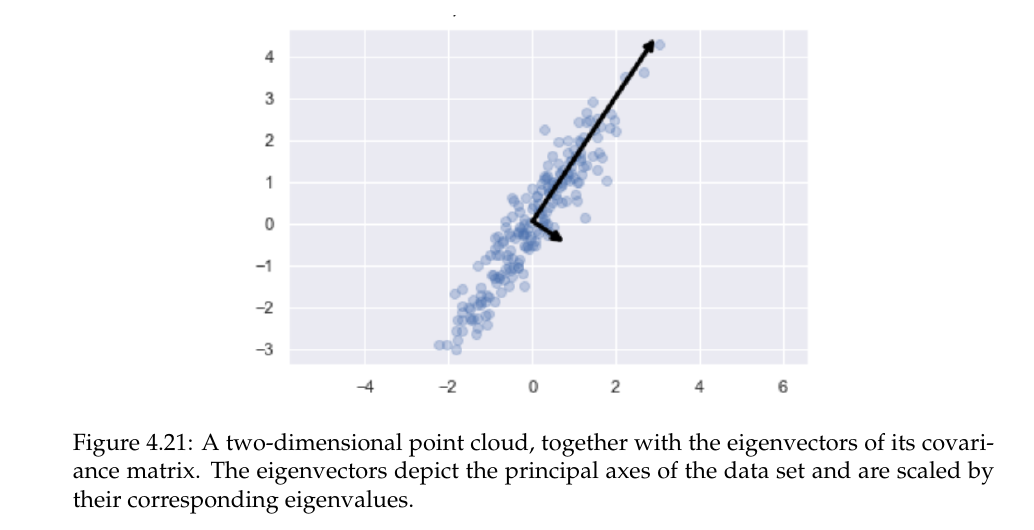

# Proxima clase:
Conexion entre este analisis y el SVD: Singular Value Decomposition.